In [1]:
from src import Pipeline, Plotter
from src.utils.utils_experiment import load_data
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = 'spleen'
X, Y, gene_ids = load_data(dataset)
pipe = Pipeline(X, config='configs/'+dataset+".ini", verbose=True, col_ids=gene_ids)
pipe.run()

Dim: Knee found at 12 components. Using n=12.
Clu: Finished clustering for k=2. Score=0.24.
Clu: Finished clustering for k=4. Score=0.26.
Clu: Best score achieved for k=4 at 0.26.
Mark: Finished finding markers for cluster 0.
Mark: Finished finding markers for cluster 1.
Mark: Finished finding markers for cluster 2.
Mark: Finished finding markers for cluster 3.
Ide: Finished finding lvl1 types.
Ide: Finished finding lvl2 types.


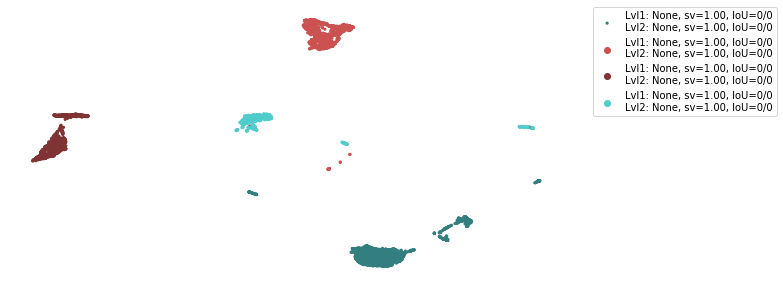

In [3]:
plotter = Plotter(pipe)
plotter.plot_clu()